In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [20]:
df = pd.read_csv (r'desktop\Rate.csv')

In [3]:
# How many rows and columns are there?
print("The number of rows and columns are " + str(df.shape))

The number of rows and columns are (12694445, 24)


In [4]:
df.head() 

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


# Let’s look at the unique values of some data columns.

In [5]:
# How many years does the data cover?
print("The number of unique years are " + str(df.BusinessYear.nunique()) + '\n')

The number of unique years are 3



In [6]:
# What are the possible values for 'Age'?
print("The possible values for 'Age' are " + str(df.Age.unique()) + '\n')

The possible values for 'Age' are ['0-20' 'Family Option' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58'
 '59' '60' '61' '62' '63' '64' '65 and over']



In [7]:
# How many states are there?
print("The number of states are " + str(df.StateCode.nunique()) + '\n')

The number of states are 39



In [8]:
# How many insurance providers are there?
print("The number of insurance providers are " + str(df.IssuerId.nunique()) + '\n')

The number of insurance providers are 910



# We know that the data covers 3 years worth of data, 39 US states and a total of 910 insurance providers. The age group ranges from 21 to 64, and three other categories “0–20”, “Family Option” & “65 and over”. Let’s look at the average amount an individual pay monthly for the insurance premium, as well as the maximum and minimum value.


In [9]:
# What are the average, maximum and minimum values for the monthly insurance premium cost for an individual? 
print("The average value for the monthly insurance premium cost for the individual is :  " + str(df.IndividualRate.mean()))
print("The max value for the monthly insurance premium cost for the individual is :  " + str(df.IndividualRate.max()))
print("The min value for the monthly insurance premium cost for the individual is :  " + str(df.IndividualRate.min()))


The average value for the monthly insurance premium cost for the individual is :  4098.026458581588
The max value for the monthly insurance premium cost for the individual is :  999999.0
The min value for the monthly insurance premium cost for the individual is :  0.0


# Investigating Individual Insurance Costs
Since we found out that the individual insurance premium costs do not seem reasonable, let’s explore it in greater details by first plotting a histogram to show the distribution.

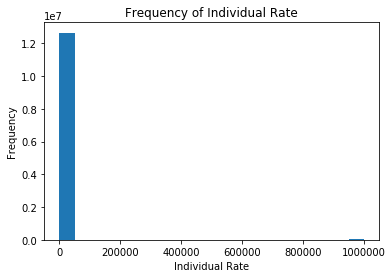

In [10]:
# plotting the histogram over the whole range
plt.hist(df.IndividualRate,bins=20)
plt.xlabel('Individual Rate')
plt.ylabel('Frequency')
plt.title('Frequency of Individual Rate')
plt.show()

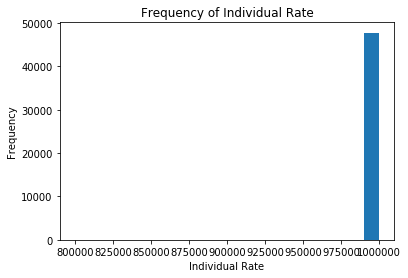

In [11]:
# plotting the histogram from 800000 to 1000000
plt.hist(df.IndividualRate,bins=20,range=(800000,1000000))
plt.xlabel('Individual Rate')
plt.ylabel('Frequency')
plt.title('Frequency of Individual Rate')
plt.show()


# Since 48000 out of 12 million is only 0.4% of the data, let’s remove them and focus on the remaining data.

In [18]:
# filter data to those premium below $2000
df=df[(df.IndividualRate>0) & (df.IndividualRate<=2000)]
print(df)

          BusinessYear StateCode  IssuerId SourceName  VersionNum  \
0                 2014        AK     21989       HIOS           6   
1                 2014        AK     21989       HIOS           6   
2                 2014        AK     21989       HIOS           6   
3                 2014        AK     21989       HIOS           6   
4                 2014        AK     21989       HIOS           6   
...                ...       ...       ...        ...         ...   
12694440          2016        WV     96480      SERFF           2   
12694441          2016        WV     96480      SERFF           2   
12694442          2016        WV     96480      SERFF           2   
12694443          2016        WV     96480      SERFF           2   
12694444          2016        WV     96480      SERFF           2   

                   ImportDate  IssuerId2  FederalTIN RateEffectiveDate  \
0         2014-03-19 07:06:49      21989  93-0438772        2014-01-01   
1         2014-03-19 07

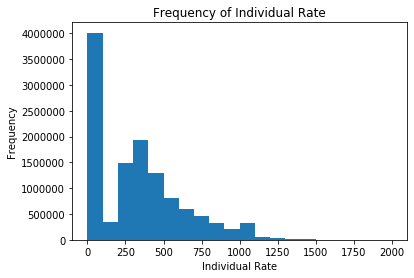

In [13]:
# Generate a new histogram with a larger number of bins (say 200).
plt.hist(df.IndividualRate,bins=20)
plt.xlabel('Individual Rate')
plt.ylabel('Frequency')
plt.title('Frequency of Individual Rate')
plt.show() 

We see that the histogram shows a clearer distribution now and there’s 15 distinct groups, i.e. 0–100, 100–200, 200–300, 300–400, 400–500, 500–600, 600–700, 700–800, 800–900, 900–1000, 1000–1100, 1100–1200, 1200–1300,1300–1400 and 1400–1500. Majority of the people close to 4000000 were paying between 0–100 and minority were paying between 1300–1500.

# Variations in Insurance Premiums across States
Having filtered our data to a more accurate and reasonable insurance premium range, let’s now explore how the premium costs vary across the 39 different US states using a boxplot.

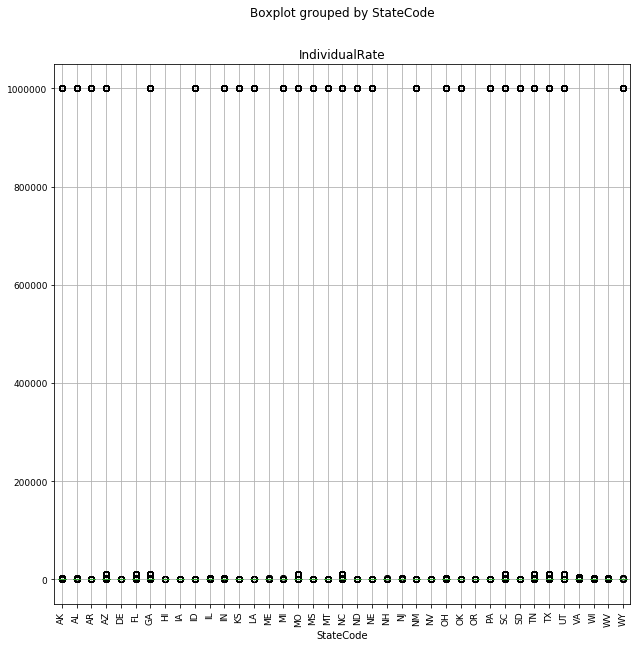

In [21]:
# rotate the axis and set a bigger figsize to ease reading
df.boxplot(column = 'IndividualRate', by = 'StateCode',rot=90,fontsize=9,figsize=(10,10))

From the boxplot, we know MO has the lowest median insurance premium rate while AK has the highest insurance premium rate.
 

# Variations in Insurance Premiums over Time
Remember that our data contains three years worth of data, let’s explore whether insurance premiums do get more expensive over time using a boxplot.

(0, 1000)

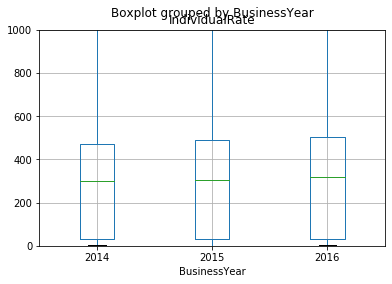

In [15]:
df.boxplot(column='IndividualRate',by='BusinessYear')
plt.ylim(0, 1000)

As seen in the boxplot, the median (denoted by the green line) is increasing slightly over the years which means insurance policies are becoming slightly more expensive over the years.

# Variations in Insurance Premiums with Age
In the real world context, we know that the older an individual is, the more prone he/she is to accidents or health illnesses, which signifies the need for insurers to charge a higher premium rate. Lastly, let’s explore if age of insurers does makes a difference in insurance premium costs using a boxplot. Note that we will have to filter out ‘Family Option’ as it is not measurable for age.

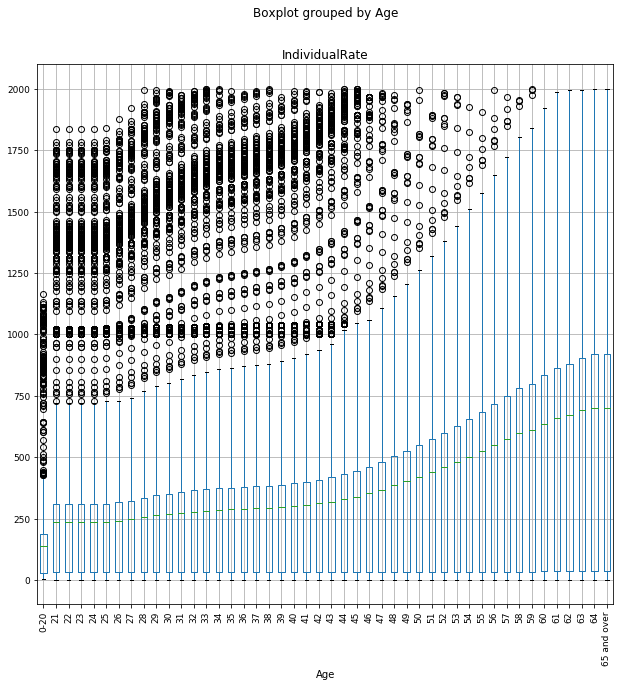

In [17]:
# Filter out 'Family Option' in order to plot boxplot
temp_insurance=df[(df.Age!='Family Option')]
temp_insurance.boxplot(column='IndividualRate',by='Age',rot=90,fontsize=9,figsize=(10,10)) 
plt.show()

# The boxplot agrees to what we have discussed earlier in the real world context. It’s clear that insurance premium cost increases with the age of the person being insured as we can see the median values increasing throughout the time period. Thus, comparing between the older people (65 and over) with the younger people (0–20), the older people pay more for insurance than younger people in terms of median cost and the difference is about 700 –150 = 550 more for the older people every month.